In [1]:
from google.colab import drive
drive.mount('/content/drive')
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.__version__

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'2.2.0'

In [0]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from sklearn import metrics

from IPython import display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import pandas as pd
import re

In [27]:
import pandas as pd
df=pd.read_csv('./drive/My Drive/Colab Notebooks/en_dup.csv', sep=',')
# df = df.drop_duplicates(subset='content', keep="first")
df


,label,content,sentiment,source,author,time
0,F,Coronavirus was created in a government lab as...,2,NaN,NaN,NaN
1,F,The lie that coronavirus came from a bat or a ...,2,NaN,NaN,NaN
2,F,The health experts had predicted the virus cou...,2,NaN,NaN,NaN
3,F,A video clip supposedly showed that the expone...,2,NaN,NaN,NaN
4,T,Almost 200 people in Italy died from the coron...,2,NaN,NaN,NaN
...,...,...,...,...,...,...
7174,F,“DDP (Democratic Progressive Party) legislator...,2,https://www.poynter.org/?ifcn_misinformation=d...,Taiwan FactCheck Center,NaN
7175,F,"In Japan, if the new coronavirus test is negat...",5,https://www.poynter.org/?ifcn_misinformation=i...,BuzzFeed Japan,NaN
7176,T,We have a perfectly coordinated and fine tuned...,2,NaN,Donald J. Trump,"8:45 PM · Mar 8, 2020"
7177,F,Official death toll over 900 but we all know t...,4,NaN,phampit,"3:57 PM · Feb 10, 2020"


In [0]:
text_load = df['content'].values
label_load_veracity = df['label']
# label_load_sentiment = df['sentiment']
label = np.zeros(len(label_load_veracity))
# label_sentiment = np.zeros(len(label_load_sentiment))
pos = 0
for i in range(len(label_load_veracity)):
  if label_load_veracity[i] == 'F':
    label[i]=1
  elif label_load_veracity[i] == 'T':
    label[i]=-1
  else:
    label[i]=0
  # if label_load_sentiment[i] >=3:
  #   label_sentiment[i] = 1
  #   pos += 1
label_load_veracity = label
# pos

In [5]:
print(len(text_load))
text_load[0],label_load_sentiment[0],label_load_veracity[0]

7179


('Coronavirus was created in a government lab as a bioweapon and then released on the people of China',
 2,
 1.0)

In [6]:
false, non_false = [], []
for i in range(len(label_load_veracity)):
  if label_load_veracity[i] == 1:
    false.append(text_load[i])
  else:
    non_false.append(text_load[i])
print(len(false))

3681


In [7]:
def get_top_n_words(corpus, n):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

get_top_n_words(false,40)

[('the', 3344),
 ('of', 1766),
 ('in', 1753),
 ('coronavirus', 1750),
 ('to', 1651),
 ('and', 1065),
 ('is', 855),
 ('covid', 740),
 ('19', 731),
 ('that', 713),
 ('for', 636),
 ('from', 510),
 ('with', 507),
 ('on', 485),
 ('has', 457),
 ('are', 444),
 ('people', 418),
 ('china', 374),
 ('virus', 358),
 ('by', 354),
 ('it', 347),
 ('can', 338),
 ('be', 287),
 ('will', 270),
 ('was', 268),
 ('wuhan', 256),
 ('have', 255),
 ('you', 250),
 ('video', 243),
 ('as', 235),
 ('this', 235),
 ('an', 231),
 ('new', 227),
 ('not', 219),
 ('chinese', 218),
 ('who', 199),
 ('novel', 194),
 ('infected', 186),
 ('outbreak', 181),
 ('been', 178)]

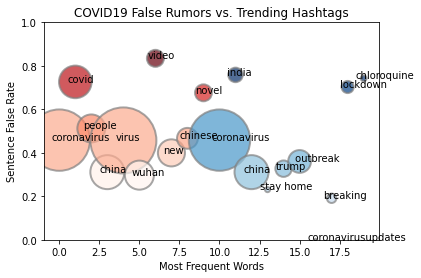

In [8]:
hashtags = ['coronavirus', 'covid', 'people','china', 'virus', 'wuhan', 'video', 'new', 'chinese', 'novel', 'coronavirus', 'india', 'china','stay home', 'trump',' outbreak','coronavirusupdates','breaking','lockdown','chloroquine']
# counts = [1739, 735, 416, 372, 355, 255, 240 ]
# hashtags = ['coronavirus',  'trump',' outbreak', 'coronavirusupdates','breaking','lockdown','chloroquine']
false_freq = []
counts = []
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
for word in hashtags:
  text_false, text_non_false = [],[]
  for i in range(len(text_load)):
    if word.lower() in text_load[i].lower():
      if label_load_veracity[i] == 1:
        text_false.append(text_load[i])
      else:
        text_non_false.append(text_load[i])
  false_freq.append(0.5 if len(text_non_false)+len(text_false) == 0 else len(text_false)/(len(text_non_false)+len(text_false)))
  counts.append(len(text_non_false)+len(text_false))
# print(false_freq)
  # print(len(text_false),len(text_non_false))
num = 10
scatter = plt.scatter(x[:num], false_freq[:num], s=counts[:num]*np.ones(num), c=false_freq[:num], cmap="Reds", alpha=0.7, edgecolors="grey", linewidth=2)
scatter = plt.scatter(x[num:], false_freq[num:], s=counts[num:]*np.ones(num), c=false_freq[num:], cmap="Blues", alpha=0.7, edgecolors="grey", linewidth=2)
# plt.xscale('log') 
# plt.yscale('log')
plt.ylim(0,1)
# plt.xlim(0.35,0.65)
for i, txt in enumerate(hashtags):
  # plt.annotate('"'+txt+'": '+str(counts[i]), (x[i], false_freq[i]))
  plt.annotate(txt, (x[i]-0.5, false_freq[i]))
# Add titles (main and on axis)
plt.xlabel("Most Frequent Words")
plt.ylabel("Sentence False Rate")
plt.title("COVID19 False Rumors vs. Trending Hashtags")

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


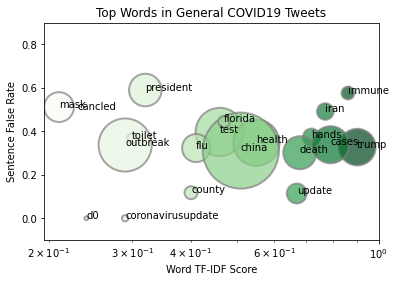

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# x = [0.72,0.47,0.22,0.16,0.1, 0.1,0.09,0.09,.08,.08, .07,.07,.07,.06,.06]
# y = [0.306,0.1875,0.1063,0.5556,0.6031,0.4733,0.3174,0.9105,0.4782,0.2,0.4646,0.7037,0.375,0.3255,0.6]
# z = [49,80,47,9,189,150,126,123,46,20,637,189,8,86,15]
# words = ['hands' , 'wash', 'washing','soap','face','mask', 'hand','water', 'wear', 'touch','people','prevent','touching','stop','mouth']
words = ['hands' , 'toilet', 'test','trump','president','health', 'flu','cancled', 'china', 'iran','d0','death','florida','county','cases','update','coronavirusupdate','outbreak','immune','mask']
x = [0.72,0.3,0.46,0.9,0.32, 0.55,0.41,0.23,.51,.77, .24,.68,.47,.4,.79,.67,.29,.29,.86,.21]

y,z = [],[]
for ind, word in enumerate(words):
  text_false, text_non_false = [],[]
  for i in range(len(text_load)):
    if word.lower() in text_load[i].lower():
      if label_load_veracity[i] == 1:
        text_false.append(text_load[i])
      else:
        text_non_false.append(text_load[i])
  # x.append(top_n_tfidf[ind])
  # words.append(word)
  y.append(0.5 if len(text_non_false)+len(text_false) == 0 else len(text_false)/(len(text_non_false)+len(text_false)))
  z.append(len(text_non_false)+len(text_false))
 
# Change color with c and alpha. I map the color to the X axis value.
scatter = plt.scatter(x[:20], y[:20], s=z[:20]*np.ones(20)*5, c=x[:20], cmap="Greens", alpha=0.7, edgecolors="grey", linewidth=2)
plt.xscale('log')
# plt.yscale('logit') 
plt.ylim(-0.1,0.9)
plt.xlim(0,1)
for i, txt in enumerate(words):
  plt.annotate(txt,(x[i], y[i]))
# Add titles (main and on axis)
plt.xlabel("Word TF-IDF Score")
plt.ylabel("Sentence False Rate")
plt.title("Top Words in General COVID19 Tweets")

plt.show()


In [0]:
def tfidf(sentences, top_n):
# sentences = non_false
  cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.5, ngram_range=(1,2))
  sf = cvec.fit_transform(sentences)
  transformer = TfidfTransformer()
  transformed_weights = transformer.fit_transform(sf)
  weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
  weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
  print(weights_df.sort_values(by='weight', ascending=False).head(20))
  return weights_df.sort_values(by='weight', ascending=False).head(top_n)

In [13]:
top_n = 23
top_n_words, top_n_tfidf = [], []
tfidf_text_load,tfidf_text_load_false,tfidf_text_load_non_false = tfidf(text_load, top_n), tfidf(false, top_n), tfidf(non_false, top_n)
for i in range(top_n):
  top_n_words.append(tfidf_text_load.values[i][0])
  top_n_tfidf.append(tfidf_text_load.values[i][1])
for i in range(top_n):
  top_n_words.append(tfidf_text_load_false.values[i][0])
  top_n_tfidf.append(tfidf_text_load_false.values[i][1])
for i in range(top_n):
  top_n_words.append(tfidf_text_load_non_false.values[i][0])
  top_n_tfidf.append(tfidf_text_load_non_false.values[i][1])
print(len(top_n_words))
print(top_n_tfidf)

                      term    weight
1145                 china  0.022326
1851                 covid  0.019536
68                      19  0.019384
1852              covid 19  0.019185
3299                 https  0.018507
7261                 wuhan  0.016644
4815                people  0.016159
6974                 virus  0.015773
4671              outbreak  0.011754
4465                   new  0.011407
1222               chinese  0.010484
3115                health  0.008335
3451              infected  0.007998
6141                spread  0.007796
1007                 cases  0.007715
6923                 video  0.007690
1722  coronavirus outbreak  0.007265
4536                 novel  0.007042
4537     novel coronavirus  0.006854
2988            government  0.006828
                   term    weight
780         coronavirus  0.049805
906               covid  0.029357
36                   19  0.029133
907            covid 19  0.028916
588               china  0.019278
2382             pe

In [0]:
# x,y,z,words = [],[],[],[]
# x = [0.72,0.47,0.22,0.16,0.1, 0.1,0.09,0.09,.08,.08, .07,.07,.07,.06,.06]
# y = [0.306,0.1875,0.1063,0.5556,0.6031,0.4733,0.3174,0.9105,0.4782,0.2,0.4646,0.7037,0.375,0.3255,0.6]
# z = [49,80,47,9,189,150,126,123,46,20,637,189,8,86,15]
# words = ['hands' , 'wash', 'washing','soap','face','mask', 'hand','water', 'wear', 'touch','people','prevent','touching','stop','mouth']

for ind, word in enumerate(top_n_words):
  if word == 'covid' or word == 'covid 19' or word == '19':
    pass
  else:
    text_false, text_non_false = [],[]
    for i in range(len(text_load)):
      if word.lower() in text_load[i].lower():
        if label_load_veracity[i] == 1:
          text_false.append(text_load[i])
        else:
          text_non_false.append(text_load[i])
    x.append(top_n_tfidf[ind])
    words.append(word)
    y.append(len(text_false)/(len(text_non_false)+len(text_false)))
    z.append(len(text_non_false)+len(text_false))

In [15]:
print(len(words))

80


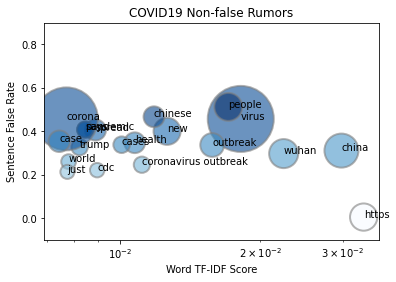

In [16]:
def plot_tfidf(x,y,z,words):
  # Change color with c and alpha. I map the color to the X axis value.
  # plt.scatter(x[:20], y[:20], s=z[:20]*np.ones(20)*6, c=y[:20], cmap="Greens", alpha=0.7, edgecolors="grey", linewidth=2)
  # plt.scatter(x[20:40], y[20:40], s=z[20:40]*np.ones(20), c=y[20:40], cmap="Oranges", alpha=0.7, edgecolors="grey", linewidth=2)
  # plt.scatter(x[40:60], y[40:60], s=z[40:60]*np.ones(20), c=y[40:60], cmap="Reds", alpha=0.7, edgecolors="grey", linewidth=2)
  plt.scatter(x[60:80], y[60:80], s=z[60:80]*np.ones(20), c=y[60:80], cmap="Blues", alpha=0.6, edgecolors="grey", linewidth=2)
  plt.xscale('log') 
  plt.ylim(-0.1,0.9)
  # plt.xlim(-0.1,1.1)
  # for i, txt in enumerate(words):
  #   # if i < 20 or 40<=i<60:
  #   if 60<=i<80:
  #     plt.annotate(txt, (x[i], y[i]))
  for i, txt in enumerate(words):
    if 60<=i<80:
      plt.annotate(txt, (x[i], y[i]))

  # kw = dict(prop="sizes", num=3, color=scatter.cmap(0.7), fmt="{x:.0f}",
  #           func=lambda s: s/7)
  # legend2 = plt.legend(*scatter.legend_elements(**kw),
  #                     loc="upper center", title="Word Count")

  # Add titles (main and on axis)
  plt.xlabel("Word TF-IDF Score")
  plt.ylabel("Sentence False Rate")
  plt.title("COVID19 Non-false Rumors")
  plt.show()

plot_tfidf(x,y,z,words)

In [22]:
i=0

for line in text_load:
  
  for word in line.split():
    if len(word)>20:
      line = line.replace(word, 'UNK')
#       word = 'UNK'
  text_load[i] = line
  i+=1
print(text_load[0])
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(text_load)
text_as_int = tokenizer.texts_to_sequences(text_load)
print(len(text_as_int))
print(text_as_int[0])
tokenizer.sequences_to_texts([text_as_int[0]])

Coronavirus was created in a government lab as a bioweapon and then released on the people of China
7179
[3, 36, 421, 5, 6, 68, 206, 25, 6, 815, 7, 323, 496, 11, 1, 20, 4, 13]


['coronavirus was created in a government lab as a bioweapon and then released on the people of china']

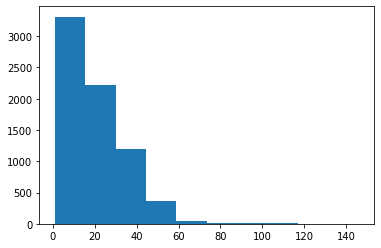

146
15215 unique words
(7179, 60)


In [23]:
len_sen = [len(sublist) for sublist in text_as_int]  
import matplotlib.pyplot as plt
_ = plt.hist(len_sen)
plt.show()

print(max(len_sen))
list_of_int = [item for sublist in text_as_int for item in sublist]
vocab = sorted(set(list_of_int))
print ('{} unique words'.format(len(vocab)))

# tokenizer.sequences_to_texts([[1]])

text_as_int = tf.keras.preprocessing.sequence.pad_sequences(text_as_int,
                                                     value=0,
                                                     padding='post',
                                                     maxlen=60)
print(text_as_int.shape)

In [24]:
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(text_as_int)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7179 samples in 0.055s...
[t-SNE] Computed neighbors for 7179 samples in 6.283s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7179
[t-SNE] Computed conditional probabilities for sample 2000 / 7179
[t-SNE] Computed conditional probabilities for sample 3000 / 7179
[t-SNE] Computed conditional probabilities for sample 4000 / 7179
[t-SNE] Computed conditional probabilities for sample 5000 / 7179
[t-SNE] Computed conditional probabilities for sample 6000 / 7179
[t-SNE] Computed conditional probabilities for sample 7000 / 7179
[t-SNE] Computed conditional probabilities for sample 7179 / 7179
[t-SNE] Mean sigma: 386.236003
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.206863
[t-SNE] KL divergence after 300 iterations: 2.867069
t-SNE done! Time elapsed: 31.568588256835938 seconds


In [30]:
import pandas as pd
feat_cols = [ 'words'+str(i) for i in range(text_as_int.shape[1]) ]
df = pd.DataFrame(text_as_int,columns=feat_cols)
df['y'] = label_load_veracity
df['label_falseness'] = df['y'].apply(lambda i: str(i))
bins_falseness = np.arange(0,1.1,0.1)

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (7179, 64)


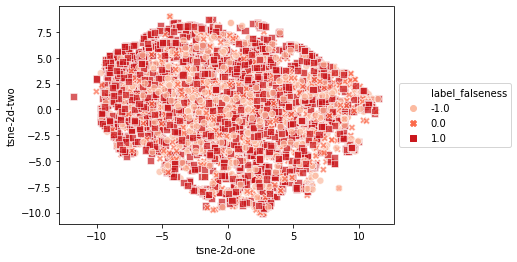

In [33]:
import seaborn as sns
# plt.figure(figsize=(16,10))
g = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label_falseness",
    palette=sns.color_palette("Reds", 3),
    # hue = "label_falseness",
    style="label_falseness",
    # palette=sns.color_palette("Reds", 2),
    data=df,
    # legend="full",
    s=50,
    alpha=0.7
)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)



In [34]:
df=pd.read_csv('./drive/My Drive/Colab Notebooks/USC_Melady_Lab_hasDup.csv', sep=',')
df = df.dropna()
df = df.reset_index(drop=True)
df

,label,content,time
0,conspiracy-unreliable-bias,Convicted Murderer Re-Arrested After Being Fre...,2020-04-11T00:04:27
1,conspiracy-unreliable-bias,150 Members of Saudi Arabia Royal Family are I...,2020-04-11T00:05:03
2,unreliable,MORE FRAUD EXPOSED: Washington State Coronavir...,2020-04-11T00:05:46
3,unreliable,New German Study Finds Coronavirus Mortality R...,2020-04-11T00:06:39
4,unreliable,@jasoneclarke @Reptoid_Hunter @ClarkeMicah @Jo...,2020-04-11T00:07:00
...,...,...,...
35104,conspiracy,Rush Limbaugh Scorches Media For Politicizing ...,2020-03-01T00:15:27
35105,conspiracy,"Trump Exposes ""Dishonest"" Media Critics, Insis...",2020-03-01T00:14:50
35106,political-clickbait,#Trump told America a ‘wonderful WOMAN’ died f...,2020-03-01T00:14:40
35107,satire,"Report: Outbreak of idiocy spreading 10,000 ti...",2020-03-01T00:14:30


In [36]:
df_dupe = df[df.duplicated(subset=['content'],keep=False)]
df_dupe = df_dupe.reset_index(drop=True)
df_dupe

,label,content,time
0,conspiracy-unreliable-bias,Convicted Murderer Re-Arrested After Being Fre...,2020-04-11T00:04:27
1,conspiracy-unreliable-bias,150 Members of Saudi Arabia Royal Family are I...,2020-04-11T00:05:03
2,unreliable,MORE FRAUD EXPOSED: Washington State Coronavir...,2020-04-11T00:05:46
3,unreliable,Covid tears: ‘No masks nurse’ story shows how ...,2020-04-11T00:26:20
4,unreliable,New German Study Finds Coronavirus Mortality R...,2020-04-11T00:26:58
...,...,...,...
13718,political-clickbait,American with coronavirus speaks out for first...,2020-03-01T00:18:22
13719,political-clickbait,Democrat grills Pompeo on whether coronavirus ...,2020-03-01T00:16:54
13720,bias,Media Claims Trump Called Coronavirus A ‘Hoax....,2020-03-01T00:16:23
13721,conspiracy,"Trump Exposes ""Dishonest"" Media Critics, Insis...",2020-03-01T00:14:50


In [37]:
df_unreliable_dupe = df_dupe
# df_unreliable_dupe = df_dupe[df_dupe['label']=='clickbait']
text_unreliable_dupe = df_unreliable_dupe['content'].values
time_unreliable_dupe = df_unreliable_dupe['time'].values
time_stamp_unreliable_dupe = [int(time_unreliable_dupe[i][5:7])*100+int(time_unreliable_dupe[i][8:10]) for i in range(len(time_unreliable_dupe))]

time_unreliable_sorted_dupe = np.zeros(len(time_stamp_unreliable_dupe))
for i in range(len(time_stamp_unreliable_dupe)):
  if time_stamp_unreliable_dupe[i] < 400:
    time_unreliable_sorted_dupe[i] = time_stamp_unreliable_dupe[i]-300
  else:
    time_unreliable_sorted_dupe[i] = time_stamp_unreliable_dupe[i]-400 + 31
# print(time_unreliable_sorted_dupe)
print(len(time_unreliable_sorted_dupe))

13723


In [38]:
df_unreliable = df_unreliable_dupe.drop_duplicates(subset='content')
text_unreliable = df_unreliable['content'].values
time_unreliable= df_unreliable['time'].values
time_stamp_unreliable = [int(time_unreliable[i][5:7])*100+int(time_unreliable[i][8:10]) for i in range(len(time_unreliable))]

time_unreliable_sorted = np.zeros(len(time_stamp_unreliable))
for i in range(len(time_stamp_unreliable)):
  if time_stamp_unreliable[i] < 400:
    time_unreliable_sorted[i] = time_stamp_unreliable[i]-300
  else:
    time_unreliable_sorted[i] = time_stamp_unreliable[i]-400 + 31
print(time_unreliable_sorted)
print(len(time_unreliable_sorted))

[42. 42. 42. ...  1.  1.  1.]
3480


[0.05258621 0.05143678 0.04396552 0.0454023  0.04971264 0.04109195
 0.04942529 0.05143678 0.05172414 0.05229885 0.03563218 0.03045977
 0.03275862 0.02988506 0.03304598 0.03362069 0.02327586 0.02701149
 0.02241379 0.02270115 0.02787356 0.03850575 0.0341954  0.03563218
 0.02787356 0.03103448 0.03045977 0.04568966 0.03275862 0.03132184
 0.2341954  0.22270115 0.22471264 0.2204023  0.21867816 0.22701149
 0.2204023  0.26293103 0.25890805 0.23994253 0.24396552 0.25431034]


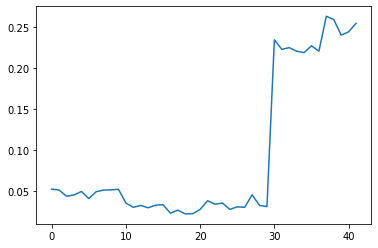

In [39]:
count_unreliable = np.zeros((len(text_unreliable),int(max(time_unreliable_sorted))))
for i, item in enumerate(text_unreliable):
  # print(item)
  indices = [j for j, x in enumerate(text_unreliable_dupe) if x == item]
  # print(indices)
  for index in indices:
    # print(int(time_unreliable_sorted_dupe[index]))
    count_unreliable[i,int(time_unreliable_sorted_dupe[index])-1] += 1 
sum_unreliable = count_unreliable.sum(axis = 0)
mean_unreliable = count_unreliable.mean(axis = 0)
# std_unreliable = count_unreliable.std(axis = 0)
print(mean_unreliable)
plt.plot(mean_unreliable)

In [43]:
!pip install powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24787 sha256=b6589b058e78901911a34a0285b3dc1f8a424085fe292cf61b23c3ebf2267e81
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


In [45]:
import powerlaw

data = mean_unreliable[:39]
fit = powerlaw.Fit(data)
print(fit.power_law.xmin,fit.power_law.alpha, fit.power_law.sigma)
print(fit.lognormal.xmin,fit.lognormal.mu, fit.lognormal.sigma)
theoretical_distribution = powerlaw.Power_Law(xmin=fit.power_law.xmin, parameters=[fit.power_law.alpha])
simulated_data = theoretical_distribution.generate_random(10000)
# simulated_data = fit.power_law.generate_random(len(data))
from scipy.stats import ks_2samp
_,p_powerlaw = ks_2samp(data,simulated_data)
print(p_powerlaw)
theoretical_distribution = powerlaw.Lognormal(xmin=fit.lognormal.xmin, parameters=[fit.lognormal.mu,fit.lognormal.sigma])
simulated_data = theoretical_distribution.generate_random(10000)
# simulated_data = fit.power_law.generate_random(len(data))
# from scipy.stats import ks_2samp
_,p_lognormal = ks_2samp(data,simulated_data)
print(p_lognormal)

Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


0.022413793103448276 2.108514465371683 0.1775043748062008
0.022413793103448276 -8.794165536136422 2.4476556032508547
0.267849903275007
0.18271469813876917


In [0]:
# print(fit.distribution_compare('truncated_power_law','lognormal'))
print(fit.distribution_compare('lognormal','power_law'))
# print(fit.distribution_compare('lognormal','exponential'))

(0.20346829737110406, 0.5652633023236149)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


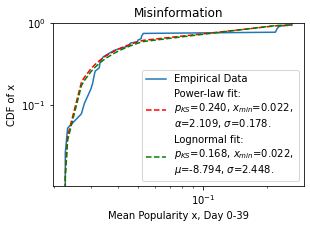

In [0]:
fig1 = plt.figure(figsize=(4.5,3))
fig1 = fit.plot_cdf(label = 'Empirical Data')
fit.power_law.plot_cdf(ax=fig1, color='r', linestyle='--',label = 'Power-law fit: '+'\n' +r'$p_{KS}$'+'={0:.3f}, '.format(p_powerlaw)+r'$x_{min}$'+'={0:.3f}, '.format(fit.power_law.xmin)+'\n'
                                                                                     +r'$\alpha$'+'={0:.3f}, '.format(fit.power_law.alpha)+r'$\sigma$'+'={0:.3f}.'.format(fit.power_law.sigma))
fit.lognormal.plot_cdf(ax=fig1, color='g', linestyle='--', label = 'Lognormal fit: '+'\n' +r'$p_{KS}$'+'={0:.3f}, '.format(p_lognormal)+r'$x_{min}$'+'={0:.3f}, '.format(fit.lognormal.xmin)+'\n'
                                                                                     +r'$\mu$'+'={0:.3f}, '.format(fit.lognormal.mu)+r'$\sigma$'+'={0:.3f}.'.format(fit.lognormal.sigma))
fig1.set_ylabel("CDF of x")
fig1.set_xlabel("Mean Popularity x, Day 0-39")
fig1.set_title("Misinformation")
# fig1.set_xticks(np.arange(0.14,0.3,0.1),[0.1,0.3])
# fig1.set_xlim(0.14,0.26)
fig1.set_ylim(0,1)
fig1.set_yticks(np.arange(0,1,1),[0,1])
fig1.legend(loc = 'lower right')
# fig1.figure.savefig('unreliable_model.png', transparent=True,bbox_inches = "tight")

In [0]:
from scipy.optimize import curve_fit
def func_powerlaw(x, m, c, c0):
  return c0+ x**m * c
sol1,_ = curve_fit(func_powerlaw,np.arange(25), mean_unreliable[10:35],maxfev = 2000) #0-41
# sol2,_ = curve_fit(func_powerlaw,np.arange(25), mean_political[10:35],maxfev = 2000) #0-10, 11-36
# sol3,_ = curve_fit(func_powerlaw,np.arange(20), mean_bias[15:35],maxfev = 2000) #14/17-37
# sol4,_ = curve_fit(func_powerlaw,np.arange(25), mean_conspiracy[11:36],maxfev = 1500) # 0-13, 8/14-20, 22-34
# sol5,_ = curve_fit(func_powerlaw,np.arange(33), mean_clickbait[9:],maxfev = 1500) #0-18, 27-40
sol1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


array([5.98841712e+00, 2.01118969e-09, 1.12064483e-02])

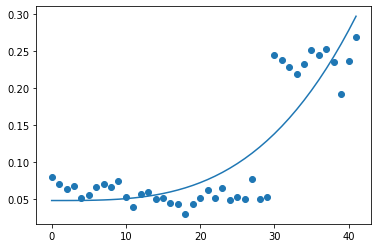

In [0]:
from scipy.stats import ks_2samp
# stats.kstest(mean_unreliable, 'expon')

plt.scatter(np.arange(42), mean_unreliable)
plt.plot(np.arange(42),func_powerlaw(np.arange(42),*sol1))

In [0]:
length = 25
# plt.figure(figsize = (3,2))
# plt.scatter(np.arange(length), mean_unreliable[10:length+10]-sol1[2])
# plt.plot(np.arange(length),func_powerlaw(np.arange(length),*sol1)-sol1[2])
# plt.scatter(np.arange(length), mean_political[10:length+10]-sol2[2],color=u'#ff7f0e')
# plt.plot(np.arange(length),func_powerlaw(np.arange(length),*sol2)-sol2[2],color=u'#ff7f0e')
# length = 20
# plt.scatter(np.arange(length), mean_bias[15:35]-sol3[2],color= u'#2ca02c')
# plt.plot(np.arange(length),func_powerlaw(np.arange(length),*sol3)-sol3[2],color= u'#2ca02c')
# length = 25
plt.scatter(np.arange(length), mean_conspiracy[11:length+11]-sol4[2],color=u'#d62728')
plt.plot(np.arange(length),func_powerlaw(np.arange(length),*sol4)-sol4[2],color=u'#d62728')
# plt.scatter(np.arange(33), mean_clickbait[9:]-sol5[2],color=u'#9467bd')
# plt.plot(np.arange(33),func_powerlaw(np.arange(33),*sol5)-sol5[2],color=u'#9467bd')
plt.xlabel('Log Time')
plt.ylabel('Log Popularity')
plt.yscale('log')
plt.xscale('log')
plt.savefig('conspiracy.png', transparent=True,bbox_inches = "tight")

Text(0.5, 36.72222222222221, 'Day 0-41')

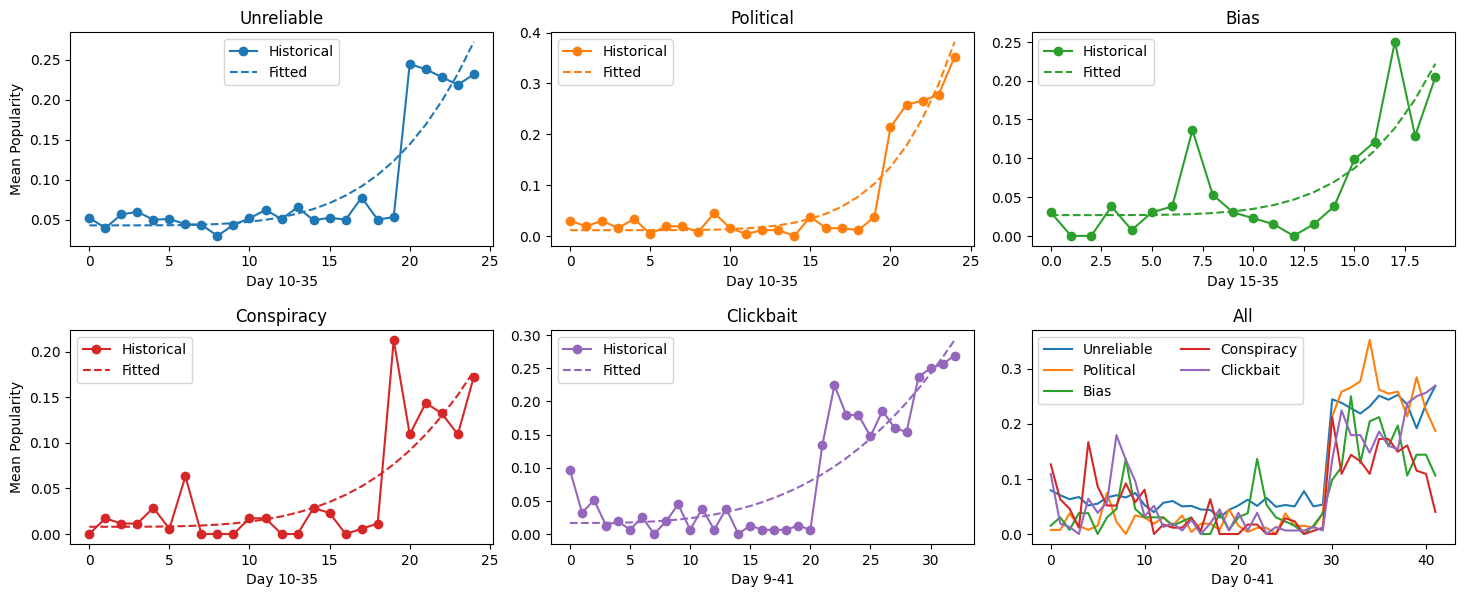

In [0]:
# length = 36
# import matplotlib.style
# import matplotlib as mpl
# mpl.style.use('seaborn-colorblind')
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,6))
ax = f.add_subplot(111) 
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 = f.add_subplot(233)
ax4 = f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 = f.add_subplot(236)
f.tight_layout(h_pad=4.0)
ax1.plot(mean_unreliable[10:length+10],label='Historical',color=u'#1f77b4',marker='o')
ax2.plot(mean_political[10:length+10],label='Historical',color=u'#ff7f0e',marker='o')
ax3.plot(mean_bias[15:35],label='Historical',color= u'#2ca02c',marker='o')
ax4.plot(mean_conspiracy[11:length+11],label='Historical',color=u'#d62728',marker='o')
ax5.plot(mean_clickbait[9:],label='Historical',color=u'#9467bd',marker='o')
ax6.plot(mean_unreliable,label='Unreliable')
ax6.plot(mean_political,label='Political')
ax6.plot(mean_bias,label='Bias')
ax6.plot(mean_conspiracy,label='Conspiracy')
ax6.plot(mean_clickbait,label='Clickbait')
ax1.plot(np.arange(length),func_powerlaw(np.arange(length),*sol1),u'#1f77b4',linestyle = '--',label='Fitted')
ax2.plot(np.arange(length),func_powerlaw(np.arange(length),*sol2),u'#ff7f0e',linestyle = '--', label='Fitted')
ax3.plot(np.arange(20),func_powerlaw(np.arange(20),*sol3),u'#2ca02c',linestyle = '--',label='Fitted')
ax4.plot(np.arange(length),func_powerlaw(np.arange(length),*sol4),u'#d62728',linestyle = '--',label='Fitted')
ax5.plot(np.arange(33),func_powerlaw(np.arange(33),*sol5),u'#9467bd',linestyle = '--',label='Fitted')
ax1.legend()
# ax1.set_xscale('log')
# ax1.set_yscale('log')
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend(loc='upper left',ncol = 2)
ax1.set_title('Unreliable')
ax2.set_title('Political')
ax3.set_title('Bias')
ax4.set_title('Conspiracy')
ax5.set_title('Clickbait')
ax6.set_title('All')
ax1.set_xlabel('Day 10-35')
ax1.set_ylabel('Mean Popularity')
ax2.set_xlabel('Day 10-35')
# ax2.set_ylabel('Mean Popularity')
ax3.set_xlabel('Day 15-35')
ax4.set_ylabel('Mean Popularity')
ax4.set_xlabel('Day 10-35')
ax5.set_xlabel('Day 9-41')
ax6.set_xlabel('Day 0-41')
# ax.set_title('Mininformation Spreading Trends (Power Law Fitted)')

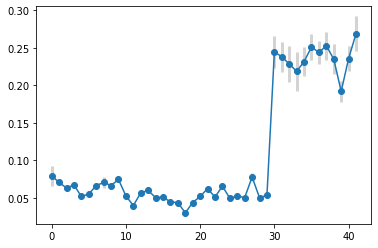

In [0]:
plt.plot(mean_unreliable)
plt.errorbar(np.arange(42), mean_unreliable, yerr=std_unreliable**2/100, fmt='o',
             ecolor='lightgray', elinewidth=3, capsize=0);


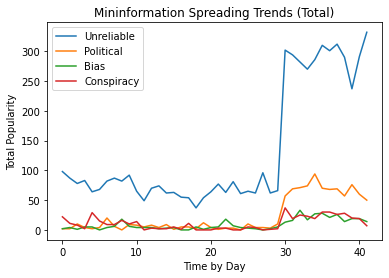

In [0]:
import matplotlib.pyplot as plt
plt.plot(sum_unreliable,label='Unreliable') # plotting by columns
plt.plot(sum_political,label='Political')
plt.plot(sum_bias,label='Bias')
plt.plot(sum_conspiracy,label='Conspiracy')
# plt.yscale('log')
plt.legend()
plt.xlabel('Time by Day')
plt.ylabel('Total Popularity')
plt.title('Mininformation Spreading Trends (Total)')
plt.show()

In [0]:
top_n = 10
top_n_words, top_n_tfidf = [], []
tfidfs = tfidf(text_political, top_n)
for i in range(top_n):
  top_n_words.append(tfidfs.values[i][0])
  top_n_tfidf.append(tfidfs.values[i][1])
print(len(top_n_words))
print(top_n_tfidf)

                       term    weight
11325                 trump  0.025139
1910                  china  0.010965
7674                   news  0.008388
8356                 people  0.008266
8156               pandemic  0.007586
9536               response  0.007374
2978                covid19  0.007126
9404                 report  0.006838
9155        realdonaldtrump  0.006810
7642                    new  0.006577
9864                   says  0.006406
3057                 crisis  0.006321
10658                 story  0.005999
11977                 virus  0.005726
2782   coronavirus response  0.005670
3186                  daily  0.005600
6307                   just  0.005388
2973                  covid  0.005361
2730   coronavirus pandemic  0.005328
7142                  media  0.005321
10
[0.025138605356440753, 0.01096477231450504, 0.008388103841064455, 0.008265942876171849, 0.007586329902914011, 0.007374171946725986, 0.0071264351904352565, 0.006837578229234129, 0.00681027666414554, 0

In [0]:
time_unreliable_sorted = np.zeros(len(time_unreliable))
for i in range(len(time_unreliable)):
  if time_unreliable[i] < 400:
    time_unreliable_sorted[i] = time_unreliable[i]-300
  else:
    time_unreliable_sorted[i] = time_unreliable[i]-400 + 31
print(time_unreliable_sorted)
time_political_sorted = np.zeros(len(time_political))
for i in range(len(time_political)):
  if time_political[i] < 400:
    time_political_sorted[i] = time_political[i]-300
  else:
    time_political_sorted[i] = time_political[i]-400 + 31
time_political_sorted

[42. 42. 42. ...  1.  1.  1.]


array([42., 42., 42., ...,  1.,  1.,  1.])

In [0]:
count_unreliable = np.zeros(int(max(time_unreliable_sorted)))
for i in range(len(text_unreliable)):
  if 'coronavirus' in text_unreliable[i].lower():
    count_unreliable[int(time_unreliable_sorted[i])-1] += 1 
print(count_unreliable)
count_political = np.zeros(int(max(time_political_sorted)))
for i in range(len(text_political)):
  if 'coronavirus' in text_political[i].lower():
    count_political[int(time_political_sorted[i])-1] += 1 
print(count_political)

[ 75.  90. 100.  75.  99.  92.  77.  74.  99.  95.  85.  81. 117. 107.
 117. 119. 120.  69.  44. 110. 114. 107. 113.  87. 115. 106. 100.  96.
  94. 102. 289. 258. 325. 303. 229. 290. 297. 276. 269. 286. 258. 327.]
[ 73.  62.  69.  72.  58.  53.  49.  61.  79.  74.  77.  98.  85.  95.
  96.  85.  79.  85.  64.  46.  74.  83.  81.  94. 106.  82.  77.  65.
  86.  74. 419. 412. 387. 413. 303. 314. 353. 411. 376. 451. 430. 433.]
